In [2]:
import sys
import json
import base64
import numpy as np
from scipy import misc

import matplotlib.pyplot as plt

from pathlib import Path

import skvideo.io

In [3]:
PATH = Path.cwd()

In [4]:
DATA_PATH = Path('../data')

In [35]:
# file = sys.argv[-1]
file = '../data/test_video.mp4'
# file = '../data/outputvideo.mp4'
video = skvideo.io.vread(file)

In [36]:
video.shape

(31, 600, 800, 3)

In [6]:
def decode(packet):
	img = base64.b64decode(packet)
	filename = PATH/'image.png'
	with open(filename, 'wb') as f:
			f.write(img)
	result = misc.imread(filename)
	return result

with open(PATH/'results.json') as json_data:
	ans_data = json.loads(json_data.read())
	json_data.close()

frames_processed = 0

In [7]:
video[0].shape

(600, 800, 3)

In [8]:
len(video)

31

In [9]:
len(ans_data.keys())

30

In [ ]:
plt.imshow(video[14])

/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


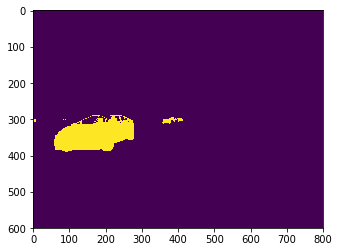

In [27]:
plt.imshow(decode(ans_data[str(15)][0]))

In [ ]:
c = decode(ans_data[str(30)][0])
r = decode(ans_data[str(30)][1])

In [ ]:
res = np.zeros_like(video[0])

In [ ]:
VEHICLES=10
ROADS=7
ROAD_LINES=6

In [ ]:
res[c] = VEHICLES
res[r] = ROADS

In [ ]:

import scipy.misc

In [ ]:
(DATA_PATH/f'AnswersSeg').mkdir(exist_ok=True)
(DATA_PATH/f'AnswersRGB').mkdir(exist_ok=True)

In [ ]:
ans_data.keys()

In [ ]:
video.shape

In [ ]:
rlist = []
for frame in range(1,len(ans_data.keys())+1):
    res = np.zeros_like(video[frame])
    c = decode(ans_data[str(frame)][0])
    r = decode(ans_data[str(frame)][1])
    res[c==True] = VEHICLES
    res[r==True] = ROADS
    rlist.append(res)
    scipy.misc.imsave(DATA_PATH/f'AnswersSeg/{frame-1}.png', res)
    scipy.misc.imsave(DATA_PATH/f'AnswersRGB/{frame-1}.png', video[frame])

In [ ]:
frame = ans_data['16']

In [ ]:
# frame[0]

In [ ]:
res = np.zeros_like(video[0])
c = decode(frame[0])
# res = np.zeros_like(c)
r = decode(frame[1])
plt.imshow(r)
print(np.mean(c))
res[c==True] = VEHICLES
print(np.mean(res))
res[r==True] = ROADS
print(np.mean(r))
print(np.mean(res))

In [ ]:
plt.imshow(res[:,:,0])

In [ ]:
plt.imshow(rlist[15][:,:,1])

In [ ]:
plt.imshow(video[16])

In [ ]:
plt.imshow(plt.imread(str(DATA_PATH/f'AnswersSeg/{13}.png'))[:,:,0])

In [ ]:
plt.imshow(plt.imread(str(DATA_PATH/f'AnswersRGB/{12}.png')))